***Loan Default Prediction using Logistic Regression***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   6000 non-null   object 
 1   age           6000 non-null   int64  
 2   gender        6000 non-null   object 
 3   income        6000 non-null   int64  
 4   job_type      6000 non-null   object 
 5   credit_score  6000 non-null   int64  
 6   loan_amount   6000 non-null   int64  
 7   term_months   6000 non-null   int64  
 8   past_default  6000 non-null   int64  
 9   EMI           6000 non-null   float64
 10  defaulted     6000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 515.8+ KB

Missing values:
 customer_id     0
age             0
gender          0
income          0
job_type        0
credit_score    0
loan_amount     0
term_months     0
past_default    0
EMI             0
defaulted      

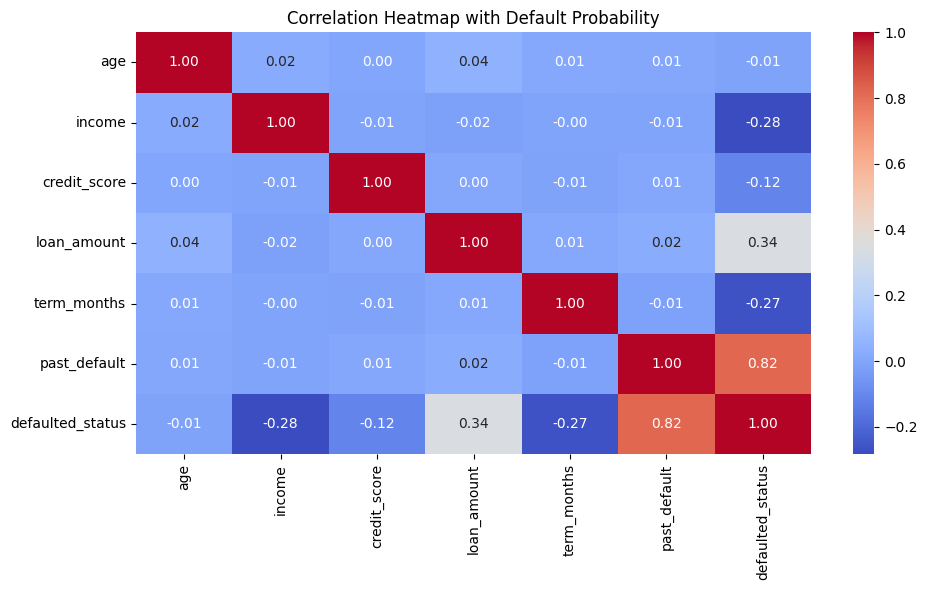

In [1]:
# Import required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

print('***Loan Default Prediction using Logistic Regression***\n')

# Load CSV file and convert to DataFrame
data = pd.read_csv(r"C:\Users\LEGION\Downloads\Loan Default Prediction.csv")
df = pd.DataFrame(data)

# Show basic info, missing values, and descriptive statistics
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nDescriptive statistics:\n", df.describe())

# Separate input features (X) and target variable (y)
X = df.drop(['customer_id', 'defaulted'], axis=1)
y = df['defaulted']

# Define categorical and numerical columns
cat_cols = ['gender', 'job_type']
num_cols = ['age', 'income', 'credit_score', 'loan_amount', 'term_months', 'past_default']

# Create preprocessing pipeline: OneHotEncoder for categorical, StandardScaler for numeric
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Create a pipeline with preprocessing and logistic regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=10000))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Add predicted probability of default for each customer to the DataFrame
df['defaulted_status'] = model.predict_proba(X)[:, 1]

# Function to check individual customer default status
def customer_default_status(customer_id, threshold=0.20):
    customer = df[df['customer_id'] == customer_id]
    if customer.empty:
        print(f"{customer_id} is not found.")
        return
    
    # Prepare input for prediction
    input_data = customer.drop(['customer_id', 'defaulted', 'defaulted_status'], axis=1)
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    if probability >= threshold:
        print(f"Customer ID {customer_id} is likely to default (Probability: {probability:.2f})")
    else:
        print(f"Customer ID {customer_id} is not likely to default (Probability: {probability:.2f})")

# Test the function with sample customer IDs
customer_default_status('CUST00001')
customer_default_status('CUST00002')

# Create correlation heatmap (numeric features + predicted default probability)
plt.figure(figsize=(10, 6))
corr_matrix = df[num_cols + ['defaulted_status']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Default Probability")
plt.tight_layout()
plt.show()
